## Connect to the datacube

In [11]:
import datacube
from datacube.utils.aws import configure_s3_access

configure_s3_access(requester_pays=True)
dc = datacube.Datacube()

In [12]:
dc.list_products()

,name,description,product_type,platform,lat,format,time,label,instrument,lon,creation_time,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,
1,ls8_l2_c2,Landsat 8 USGS Collection 1 Level2 Surface Ref...,LaSRCollection2,LANDSAT_8,None,GeoTiff,None,None,OLI_TIRS,None,None,EPSG:4326,"(-0.00027777777778, 0.00027777777778)",None,"(latitude, longitude)"


## Show the extents of the product

In [13]:
metadata = dc.load(product='ls8_l2_c2', measurements=[])

In [14]:
from utils.data_cube_utilities.dc_display_map import display_map

In [15]:
full_lon = metadata.longitude[[0, -1]].values
full_lat = metadata.latitude[[-1, 0]].values
display_map(full_lat, full_lon)

In [16]:
lon = (36.7905, 36.9461)
lat = (-1.3477, -1.2432)
display_map(lat, lon)

In [17]:
data = dc.load(product='ls8_l2_c2', lat=lat, lon=lon, time=("2014-01-01", "2014-12-31"),
               dask_chunks={'latitude': 2000, 'longitude': 2000, 'time':10}, 
               measurements=['red', 'green', 'blue'])

In [18]:
rgb = data[['red', 'green', 'blue']]

In [19]:
rgb_mean = rgb.mean('time').compute()

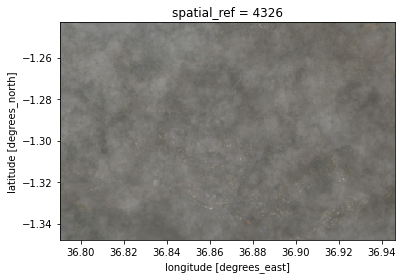

In [20]:
rgb_mean.to_array().plot.imshow(vmin=0, vmax=40000)